# PDF Extraction and Picture Description
This notebook is used to extract the images and metadata from a PDF file and describe the images.

## PDF Extraction using LM Studio

In [12]:
import logging
from pathlib import Path
import json

# --- Docling Imports ---
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import VlmPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.pipeline.vlm_pipeline import VlmPipeline

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Main PDF Conversion Function ---
def convert_pdf_with_lmstudio(pdf_path_str: str, output_dir_str: str = "output_lmstudio_conversion"):
    """
    Uses a model served by LM Studio to perform a full conversion of a PDF document,
    then saves the results in JSON format only.

    Args:
        pdf_path_str (str): The path to the source PDF file.
        output_dir_str (str): The directory to save the output files.
    """
    pdf_path = Path(pdf_path_str)
    if not pdf_path.is_file():
        logging.error(f"❌ File not found: {pdf_path}")
        return

    # --- Step 1: Setup Directories ---
    output_dir = Path(output_dir_str)
    output_dir.mkdir(parents=True, exist_ok=True)
    logging.info(f"Output will be saved in: {output_dir.resolve()}")

    # --- Step 2: Configure the VLM Pipeline to use LM Studio ---
    # IMPORTANT: This model identifier must EXACTLY match the one loaded in LM Studio.
    model_identifier = "google/gemma-3-12b-it-gguf"
    
    logging.info(f"⚙️  Configuring VLM Pipeline to use '{model_identifier}' on LM Studio...")

    # Define the connection and model parameters for the LM Studio API
    pipeline_options = VlmPipelineOptions(
        url="http://localhost:1234/v1/chat/completions",
        model=model_identifier,
        prompt="Parse the document.",
        params={"max_tokens": 16384},
        generate_page_images=True  # This is essential
    )

    # --- Step 3: Initialize the Document Converter ---
    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_cls=VlmPipeline,
                pipeline_options=pipeline_options,
            ),
        },
    )

    # --- Step 4: Run the Conversion ---
    logging.info(f"🚀 Starting PDF conversion for: {pdf_path.name}")
    try:
        result = converter.convert(pdf_path)
        document = result.document
        logging.info("✅ PDF conversion complete.")
    except Exception as e:
        logging.error(f"A critical error occurred during conversion. Is the LM Studio server running with model '{model_identifier}' loaded?", exc_info=True)
        return

    # --- Step 5: Save JSON Output ---
    logging.info(f"💾 Saving JSON output to '{output_dir.name}' directory...")
    
    # Define a base filename for the output files
    fname_base = f"{pdf_path.stem}-{model_identifier.replace('/', '_')}"

    # Save as a structured JSON file
    json_path = output_dir / f"{fname_base}.json"
    document.save_as_json(json_path)
    logging.info(f"   => Saved JSON: {json_path.name}")
    
    logging.info("🎉 JSON file generated successfully!")

# -------------------[ Script Execution ]-------------------
if __name__ == "__main__":
    # Define the source PDF file to be processed
    PDF_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\Sample Papers\1-s2.0-S1385110124000054-main.pdf"
    
    # Run the main conversion function
    convert_pdf_with_lmstudio(PDF_SOURCE)

2025-07-14 21:01:53,600 - INFO - Output will be saved in: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion
2025-07-14 21:01:53,600 - INFO - ⚙️  Configuring VLM Pipeline to use 'google/gemma-3-12b-it-gguf' on LM Studio...
2025-07-14 21:01:53,603 - INFO - 🚀 Starting PDF conversion for: 1-s2.0-S1385110124000054-main.pdf
2025-07-14 21:01:53,604 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-07-14 21:01:53,618 - INFO - Going to convert document batch...
2025-07-14 21:01:53,619 - INFO - Initializing pipeline for VlmPipeline with options hash 75529f57132c23f83dea4e9a249e41d3
2025-07-14 21:01:53,678 - INFO - Accelerator device: 'cuda:0'
2025-07-14 21:01:55,735 - INFO - Processing document 1-s2.0-S1385110124000054-main.pdf
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you en

## Picture Extraction and Description

2025-07-14 21:16:12,708 - INFO - --- Phase 1: Starting Image Extraction from 1-s2.0-S1385110124000054-main.pdf ---
2025-07-14 21:16:12,711 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-07-14 21:16:12,722 - INFO - Going to convert document batch...
2025-07-14 21:16:12,723 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 0ae8c010355c7d8e9e251f28c0e44cc7
2025-07-14 21:16:12,723 - INFO - Accelerator device: 'cuda:0'
2025-07-14 21:16:13,815 - INFO - Accelerator device: 'cuda:0'
2025-07-14 21:16:14,315 - INFO - Accelerator device: 'cuda:0'
2025-07-14 21:16:14,607 - INFO - Processing document 1-s2.0-S1385110124000054-main.pdf
2025-07-14 21:16:25,315 - INFO - Finished converting document 1-s2.0-S1385110124000054-main.pdf in 12.61 sec.
2025-07-14 21:16:25,316 - INFO - Found 17 pictures. Saving them to temp_extraction_folder\images...
2025-07-14 21:16:25,413 - INFO - ✅ Phase 1 Complete. Metadata for 17 images saved to temp_extraction_folder\metadata.json
2025


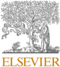

2025-07-14 21:16:27,680 - INFO -    Analyzing picture_2.png...



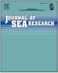

2025-07-14 21:16:28,668 - INFO -    Analyzing picture_3.png...


2025-07-14 21:16:29,660 - INFO -    Analyzing picture_4.png...



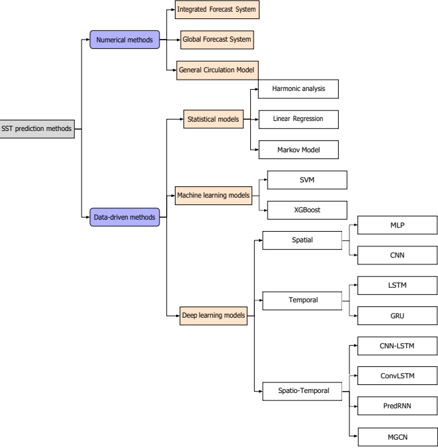

2025-07-14 21:16:33,732 - INFO -    Analyzing picture_5.png...



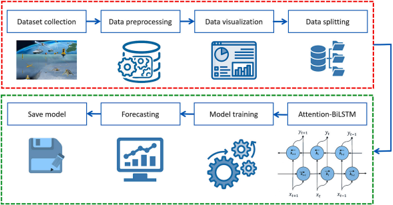

2025-07-14 21:16:37,575 - INFO -    Analyzing picture_6.png...



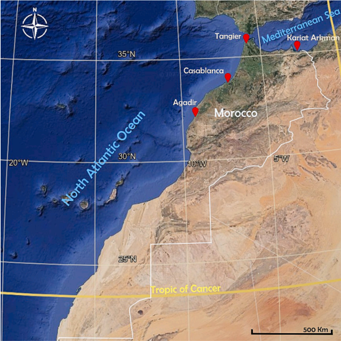

2025-07-14 21:16:40,698 - INFO -    Analyzing picture_7.png...



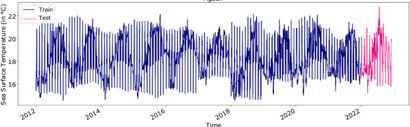

2025-07-14 21:16:43,973 - INFO -    Analyzing picture_8.png...



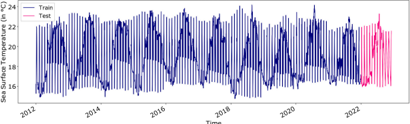

2025-07-14 21:16:47,520 - INFO -    Analyzing picture_9.png...



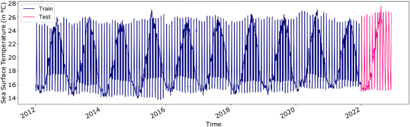

2025-07-14 21:16:51,552 - INFO -    Analyzing picture_10.png...



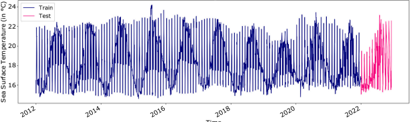

2025-07-14 21:16:55,479 - INFO -    Analyzing picture_11.png...



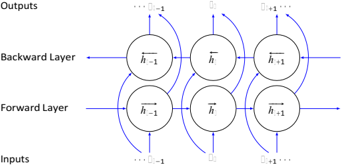

2025-07-14 21:16:58,737 - INFO -    Analyzing picture_12.png...



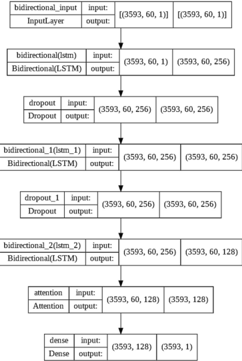

2025-07-14 21:17:04,299 - INFO -    Analyzing picture_13.png...



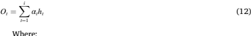

2025-07-14 21:17:04,825 - INFO -    Analyzing picture_14.png...



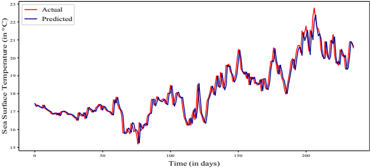

2025-07-14 21:17:07,995 - INFO -    Analyzing picture_15.png...



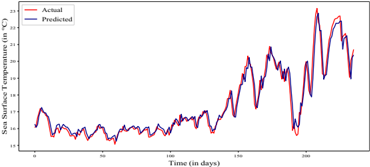

2025-07-14 21:17:11,193 - INFO -    Analyzing picture_16.png...



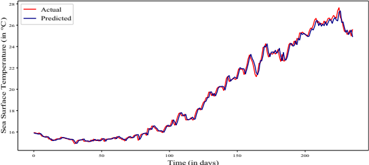

2025-07-14 21:17:14,954 - INFO -    Analyzing picture_17.png...



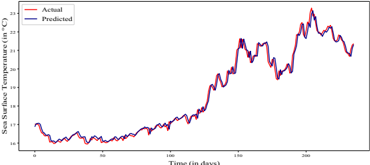

2025-07-14 21:17:18,600 - INFO - ✅ Phase 2 Complete. All images processed and displayed.
2025-07-14 21:17:18,601 - INFO - --- Phase 3: Cleaning up temporary directory: temp_extraction_folder ---
2025-07-14 21:17:18,605 - ERROR - Error removing directory temp_extraction_folder: [WinError 5] 拒绝访问。: 'temp_extraction_folder\\images'


In [ ]:
import logging
from pathlib import Path
import json
import base64
import requests
import shutil
import re

# --- Imports for Displaying Results in Jupyter ---
from IPython.display import display, HTML

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Phase 1: Extract Images from JSON File ---

def extract_images_from_json(json_path_str: str, output_dir_str: str = "temp_extraction"):
    """
    Extracts all images from a Docling-generated JSON file and saves them to a temporary folder.
    
    Args:
        json_path_str (str): The path to the source JSON file.
        output_dir_str (str): The name of the temporary directory for extracted files.
        
    Returns:
        Path object to the generated metadata JSON file, or None if it fails.
    """
    json_path = Path(json_path_str)
    if not json_path.is_file():
        logging.error(f"❌ JSON file not found: {json_path}")
        return None
        
    output_dir = Path(output_dir_str)
    images_dir = output_dir / "images"
    images_dir.mkdir(parents=True, exist_ok=True)
    
    logging.info(f"--- Phase 1: Starting Image Extraction from {json_path.name} ---")
    
    # Load the JSON data
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except json.JSONDecodeError as e:
        logging.error(f"Failed to parse JSON file: {e}")
        return None
    except Exception as e:
        logging.error(f"Failed to read JSON file: {e}")
        return None

    # Navigate to the pictures list
    pictures = data.get("pictures")
    if not pictures:
        logging.warning("⚠️ No 'pictures' key found in the JSON file, or the list is empty.")
        return None

    logging.info(f"Found {len(pictures)} pictures. Saving them to {images_dir}...")
    
    extracted_metadata = []
    saved_count = 0
    
    for i, pic_data in enumerate(pictures):
        # Extract image data from the URI
        image_uri = pic_data.get("image", {}).get("uri")
        
        if not image_uri or not image_uri.startswith("data:image"):
            logging.warning(f"Skipping picture #{i+1} - no valid image data URI found.")
            continue
            
        try:
            # Parse the data URI to extract the base64 data
            # Format: data:image/png;base64,<base64_data>
            match = re.match(r'data:image/([^;]+);base64,(.+)', image_uri)
            if not match:
                logging.warning(f"Skipping picture #{i+1} - invalid data URI format.")
                continue
                
            image_format = match.group(1)
            base64_data = match.group(2)
            
            # Decode the base64 data
            image_data = base64.b64decode(base64_data)
            
            # Save the image
            image_filename = f"picture_{saved_count+1}.png"
            image_save_path = images_dir / image_filename
            
            with open(image_save_path, "wb") as fp:
                fp.write(image_data)
            
            # Extract caption if available
            caption = "No caption found."
            if "captions" in pic_data and pic_data["captions"]:
                caption = pic_data["captions"][0].get("text", "No caption found.")
            
            # Store information for the next phase
            extracted_metadata.append({
                "id": pic_data.get('self_ref', f'picture_{saved_count+1}'),
                "image_path": str(image_save_path),
                "caption": caption
            })
            
            saved_count += 1
            logging.info(f"   ✅ Saved image {saved_count}: {image_filename}")
            
        except Exception as e:
            logging.error(f"Could not save image #{i+1}: {e}")

    if saved_count == 0:
        logging.warning("⚠️ No images were successfully extracted and saved.")
        return None

    # Save metadata
    metadata_path = output_dir / "metadata.json"
    with open(metadata_path, "w", encoding="utf-8") as f:
        json.dump(extracted_metadata, f, indent=2)
        
    logging.info(f"✅ Phase 1 Complete. Metadata for {saved_count} images saved to {metadata_path}")
    return metadata_path

# --- Phase 2: Image Analysis via LM Studio and Display ---

def analyze_and_display_images(metadata_path_str: str):
    """
    Analyzes extracted images using an LM Studio server and displays the results.
    
    Args:
        metadata_path_str (str): Path to the metadata.json file from Phase 1.
    """
    metadata_path = Path(metadata_path_str)
    if not metadata_path.is_file():
        logging.error(f"❌ Metadata file not found: {metadata_path}")
        return

    logging.info(f"--- Phase 2: Starting Image Analysis via LM Studio ---")
    
    with open(metadata_path, "r", encoding="utf-8") as f:
        images_to_process = json.load(f)

    # LM Studio server configuration
    lm_studio_url = "http://localhost:1234/v1/chat/completions"
    # IMPORTANT: Verify this model identifier matches the one loaded in your LM Studio
    model_name = "google/gemma-3-12b-it-gguf" 
    
    for item in images_to_process:
        image_path = Path(item["image_path"])
        logging.info(f"   Analyzing {image_path.name}...")

        # Encode image to Base64 to send in the API request
        try:
            with open(image_path, "rb") as img_file:
                base64_image = base64.b64encode(img_file.read()).decode('utf-8')
        except Exception as e:
            logging.error(f"Could not read or encode image {image_path}: {e}")
            continue

        # Prepare the request payload for LM Studio's OpenAI-compatible endpoint
        payload = {
            "model": model_name,
            "messages": [
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": (
                                "You are an expert scientific analyst. Your task is to analyze the provided image.\n\n"
                                "First, determine if the image is a meaningful scientific figure (like a graph, chart, diagram, or photo of an experiment) "
                                "OR if it is a non-informative element (like a publisher's logo, a journal's watermark, or a simple decorative icon).\n\n"
                                "- If the image IS a meaningful scientific figure, describe it in a detailed paragraph.\n"
                                "- If the image is a NON-INFORMATIVE element, you MUST respond with only the exact string: N/A"
                            )
                        },
                        {
                            "type": "image_url",
                            "image_url": {"url": f"data:image/png;base64,{base64_image}"}
                        }
                    ]
                }
            ],
            "max_tokens": 300
        }
        
        # Send the request and get the AI description
        try:
            response = requests.post(lm_studio_url, json=payload, timeout=240)
            response.raise_for_status()
            ai_description = response.json()["choices"][0]["message"]["content"]
        except requests.exceptions.RequestException as e:
            logging.error(f"Failed to connect to LM Studio for {image_path.name}. Is the server running? Error: {e}")
            ai_description = "N/A - Could not get description from LM Studio."
        
        # Build and display the HTML for this item
        html_item = (
            f'<div style="border: 1px solid #ddd; padding: 15px; margin-bottom: 20px; border-radius: 5px;">'
            f"<h3>Picture Analysis: <code>{item['id']}</code></h3>"
            f'<img src="data:image/png;base64,{base64_image}" style="max-width: 600px; height: auto; border: 1px solid #ccc;" /><br />'
            f"<h4>Original Caption</h4><p><i>{item['caption']}</i></p>"
            f"<h4>LM Studio Model Annotation</h4>"
            f"<blockquote style='border-left: 3px solid #ccc; padding-left: 15px; margin: 10px;'>"
            f"{ai_description.replace('\n', '<br>')}"
            f"</blockquote></div>"
        )
        display(HTML(html_item)) # Display results incrementally as they are generated

    logging.info("✅ Phase 2 Complete. All images processed and displayed.")

# --- Phase 3: Cleanup ---
def cleanup(temp_dir_str: str = "temp_extraction"):
    """Removes the temporary directory and all its contents."""
    temp_dir = Path(temp_dir_str)
    if temp_dir.exists():
        logging.info(f"--- Phase 3: Cleaning up temporary directory: {temp_dir} ---")
        try:
            shutil.rmtree(temp_dir)
            logging.info("✅ Cleanup successful.")
        except OSError as e:
            logging.error(f"Error removing directory {temp_dir}: {e}")

# -------------------[ Main Execution Block ]-------------------
if __name__ == '__main__':
    # Define the source JSON file and the temporary directory name
    JSON_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf.json"
    TEMP_FOLDER = "temp_extraction_folder"
    
    # Run Phase 1: Extract images from JSON and create metadata
    metadata_file = extract_images_from_json(JSON_SOURCE, TEMP_FOLDER)
    
    # Run Phase 2: Analyze images and display results, if Phase 1 was successful
    if metadata_file:
        analyze_and_display_images(metadata_file)
        # Run Phase 3: Clean up the temporary files
        cleanup(TEMP_FOLDER)
    else:
        logging.error("Pipeline stopped because image extraction failed.")